In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from perceptron_forecast import Perceptron
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv("Input\weatherHistory.csv")
data = data[['Formatted Date', 'Temperature (C)']]
data['Date'] = pd.to_datetime(data['Formatted Date'], yearfirst=True)
data['Date_day'] = data['Date'].map(lambda date: f'{date.year}-{date.month}-{date.day}')
data = data.sort_values(by=['Date'], ascending=True).reset_index()
data.head()

C:\Users\Royal Center\AppData\Local\Temp\ipykernel_14188\3321077789.py:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data['Date'] = pd.to_datetime(data['Formatted Date'], yearfirst=True)


,index,Formatted Date,Temperature (C),Date,Date_day
0,2880,2006-01-01 00:00:00.000 +0100,0.577778,2006-01-01 00:00:00+01:00,2006-1-1
1,2881,2006-01-01 01:00:00.000 +0100,1.161111,2006-01-01 01:00:00+01:00,2006-1-1
2,2882,2006-01-01 02:00:00.000 +0100,1.666667,2006-01-01 02:00:00+01:00,2006-1-1
3,2883,2006-01-01 03:00:00.000 +0100,1.711111,2006-01-01 03:00:00+01:00,2006-1-1
4,2884,2006-01-01 04:00:00.000 +0100,1.183333,2006-01-01 04:00:00+01:00,2006-1-1


In [21]:
data_day = data.groupby(['Date_day'])['Temperature (C)'].mean().reset_index()
data_day['Date'] = pd.to_datetime(data_day['Date_day'], yearfirst=True)
data_day = data_day.sort_values(by=['Date'], ascending=True).reset_index()
data_day['My_Date_Day'] = data_day['Date'].map(lambda date: f'{30 * (date.month - 1) + date.day}')
data_day['My_Date_Month_Day'] = data_day['Date'].map(lambda date: f'{date.month}-{date.day}')
data_day.head()

,index,Date_day,Temperature (C),Date,My_Date_Day,My_Date_Month_Day
0,0,2006-1-1,3.873148,2006-01-01,1,1-1
1,11,2006-1-2,5.418519,2006-01-02,2,1-2
2,22,2006-1-3,2.319444,2006-01-03,3,1-3
3,25,2006-1-4,2.274074,2006-01-04,4,1-4
4,26,2006-1-5,2.698148,2006-01-05,5,1-5


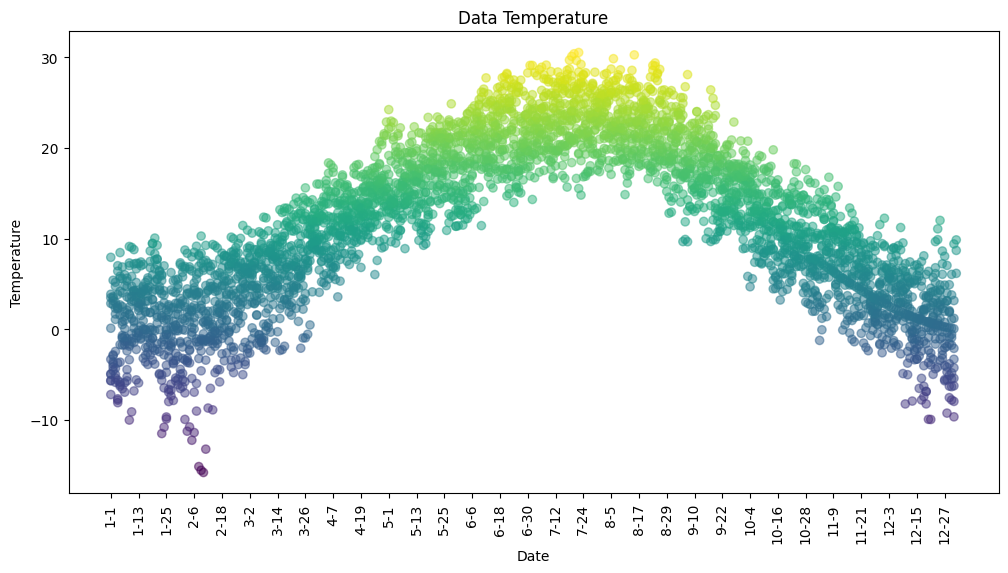

In [22]:
plt.figure(figsize=(12, 6))

plt.scatter(data_day['My_Date_Month_Day'].to_numpy(), data_day['Temperature (C)'].to_numpy(), alpha=.5,
            c=data_day['Temperature (C)'])
plt.title("Data Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.xticks(rotation='vertical')
plt.xticks(np.arange(0, 365, 12))
plt.show()

In [23]:
X = data_day['My_Date_Day'].copy().to_numpy(int)
Y = data_day['Temperature (C)'].copy().values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)

In [24]:
model = Perceptron(1, learning_rate=0.00003, function='linear')
train_losses, train_accuracies, test_losses, test_accuracies = model.fit(X_train, Y_train, X_test, Y_test, epochs=200)

100%|██████████| 200/200 [01:13<00:00,  2.73it/s]


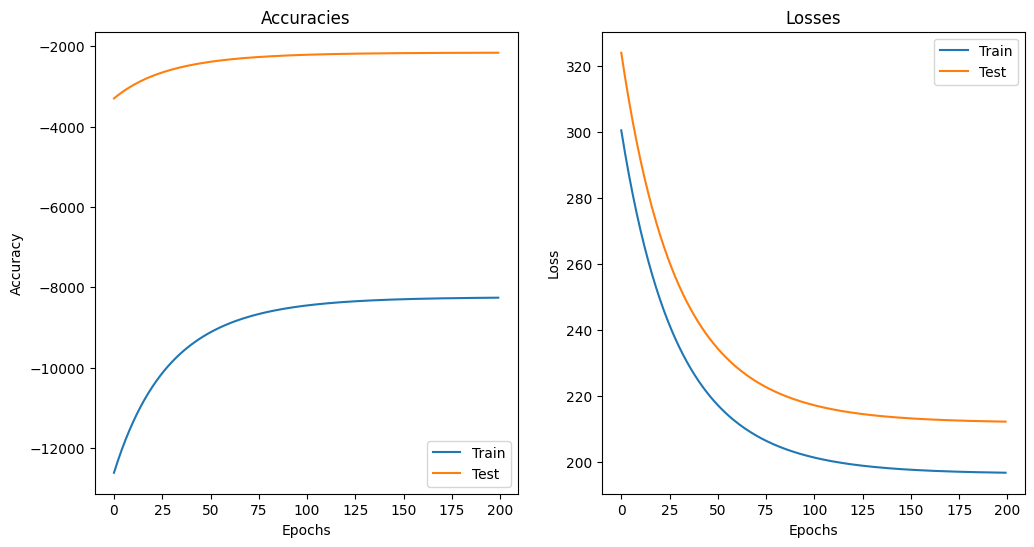

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(train_accuracies)
ax1.plot(test_accuracies)
ax1.set_title("Accuracies")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.legend(['Train', 'Test'])

ax2.plot(train_losses)
ax2.plot(test_losses)
ax2.set_title("Losses")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend(['Train', 'Test'])

plt.show()

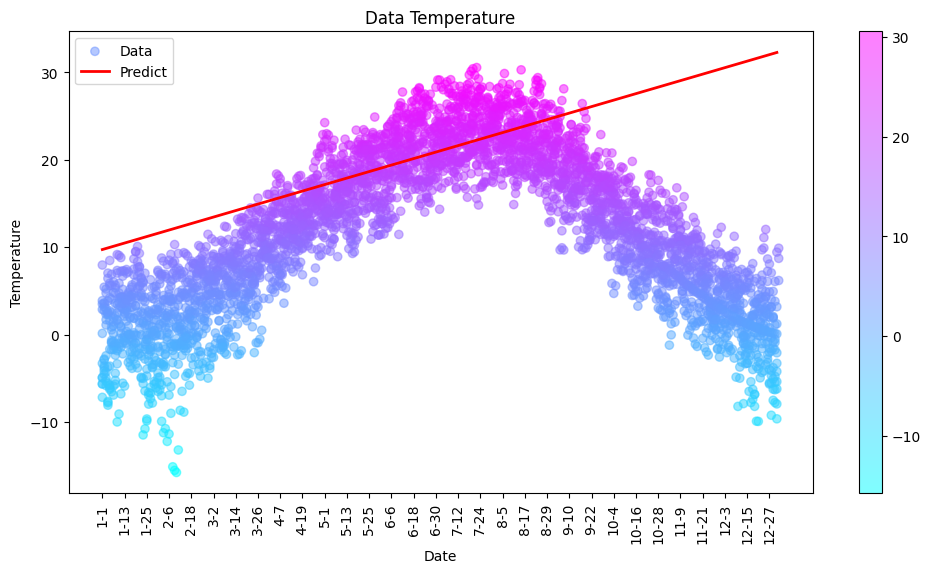

In [30]:
plt.figure(figsize=(12, 6))

plt.scatter(data_day['My_Date_Month_Day'].to_numpy(), data_day['Temperature (C)'].to_numpy(), alpha=.5,
            c=data_day['Temperature (C)'], cmap='cool')
plt.plot(model.weights[0] * range(365) + model.bias[0], c='red', linewidth=2)
plt.colorbar()
plt.title("Data Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.xticks(rotation='vertical')
plt.xticks(np.arange(0, 365, 12))
plt.legend(['Data', 'Predict'])
plt.show()

In [27]:
def predict(year_day_number: int) -> float:
    y_pred = model.predict([year_day_number])[0, 0]
    return y_pred

In [28]:
new_day = 35
print(predict(new_day))

11.88499264945215


In [29]:
np.save("Output/weight_weights.npy", model.weights[0])
np.save("Output/weight_bias.npy", model.bias[0])